In [5]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read data

In [150]:
file_path = '/Users/muxin/PyCharm/mediapipe_hand_prediction/results/finger_occlusion/overall/'
hand_landmark_path = '/Users/muxin/PyCharm/mediapipe_hand_prediction/result_analysis/finger_occlusion/hand_landmarks.png'
df1 = pd.read_csv(f'{file_path}hand_recognition/finger_occlusion_results.csv')
df2 = pd.read_csv(f'{file_path}hand_landmark_localisation/finger_occlusion_results.csv')
dfs = [df1, df2]
titles = ['Hand recognition result', 'Hand landmark localisation result']

# Hand recognition analysis

In [140]:
dfs

[    occlusion_on  precision    recall  f1_score
 0          thumb   0.834160  0.776068  0.804066
 1   index_finger   0.936143  0.771579  0.845932
 2  middle_finger   0.952212  0.744122  0.835404
 3    ring_finger   0.943979  0.744866  0.832685
 4          pinky   0.936770  0.818150  0.873451,
     occlusion_on  precision    recall  f1_score
 0          thumb   0.960948  0.799695  0.872937
 1   index_finger   0.973403  0.778385  0.865039
 2  middle_finger   0.974442  0.748491  0.846650
 3    ring_finger   0.970193  0.750037  0.846027
 4          pinky   0.976219  0.824207  0.893796]

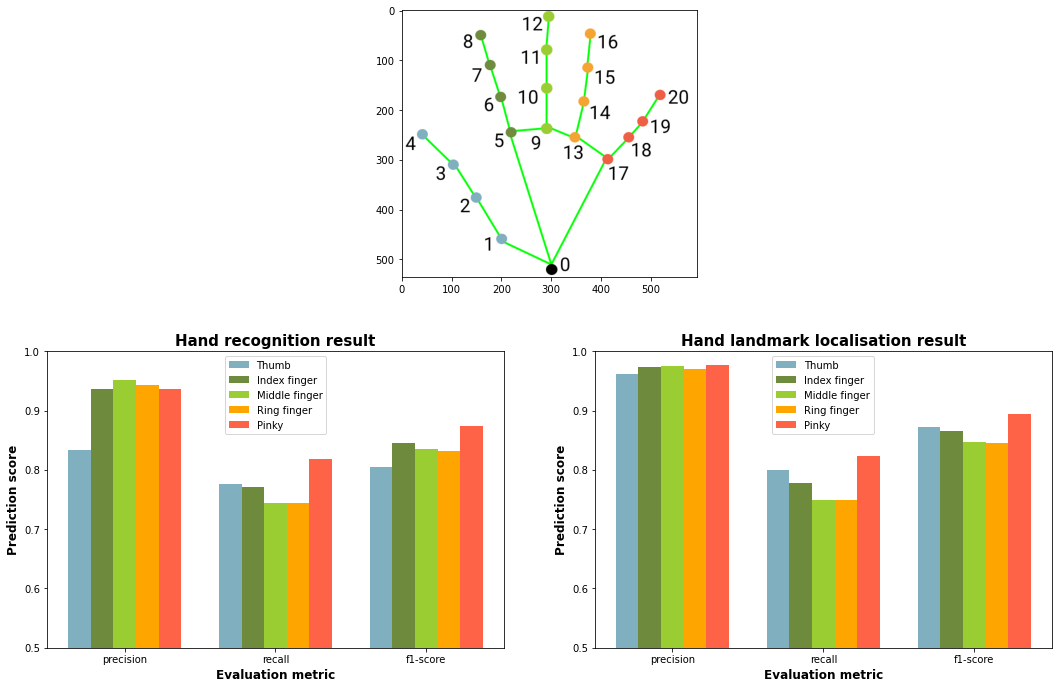

In [151]:
# Hand recognition analysis
# set width of bar
barWidth = 0.15
fig = plt.subplots(figsize =(18, 12))

# Set position of bar on X axis
br1 = np.arange(3)
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
br5 = [x + barWidth for x in br4]
for i in range(len(dfs)):
    # set height of bar
    thumb = list(dfs[i].loc[0])[1:]
    index_finger = list(dfs[i].loc[1])[1:]
    middle_finger = list(dfs[i].loc[2])[1:]
    ring_finger = list(dfs[i].loc[3])[1:]
    pinky = list(dfs[i].loc[4])[1:]

    # Make the plot
    plt.subplot(2, 2, i+3) # row 1, col 2 index 1
    plt.bar(br1, thumb, color ='#80AFBF', width = barWidth, label ='Thumb')
    plt.bar(br2, index_finger, color = '#6E8B3D', width = barWidth, label ='Index finger')
    plt.bar(br3, middle_finger, color ='#9ACD32', width = barWidth, label ='Middle finger')
    plt.bar(br4, ring_finger, color ='orange', width = barWidth, label ='Ring finger')
    plt.bar(br5, pinky, color ='tomato', width = barWidth, label ='Pinky')

    # Adding Xticks
    plt.title(titles[i], fontweight ='bold', fontsize = 15)
    plt.xlabel('Evaluation metric', fontweight ='bold', fontsize = 12)
    plt.ylabel('Prediction score', fontweight ='bold', fontsize = 12)
    plt.xticks([r + 2*barWidth for r in range(len(thumb))],['precision', 'recall', 'f1-score'])
    plt.ylim(0.5, 1)
    plt.legend()
    
image = cv2.imread(hand_landmark_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.subplot(2, 3, 2) # row 1, col 2 index 1
plt.imshow(image)
plt.show()
# wrists are excluded 